# PLINK GWAS + visualization

Post commmon PCA QC

Filter SNPs MAF >= 0.05

#### User supplied variables

In [1]:
PLINKCMD = '/usr/local/bin/plink-1.90b6.9 '

PLINK_PREFIX = '/mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/psp_adsp.common_PCA.pass_qc'
DIR_ASSOC = '/mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_all'
MODEL_NAME = 'psp_adsp.common_PCA.pass_qc.test_maf_all'


FILE_COVAR = '/mnt/adsp/users/psp_hg38_wes/data/cohort_files/fam_pheno_covar/psp_adsp.common_PCA.pass_qc.pheno.20504.2020.0626.txt'
# COVAR_STR = 'PC01,PC02,PC03'
# COVAR_STR = 'PC01,PC02,PC03,H1H2_dosage'


#### imports & setup derived variables

In [2]:
# !pip install qqman
from qqman import qqman
import os
import pandas as pd

file_plink_assoc = os.path.join(DIR_ASSOC, MODEL_NAME)
out_manhattan = os.path.join(DIR_ASSOC, MODEL_NAME+'.Manhattan.png')
out_qqplot = os.path.join(DIR_ASSOC, MODEL_NAME+'.qqplot.png')

<br>  

### Run PLINK GWAS

In [3]:
!mkdir -p {DIR_ASSOC}

In [12]:
## --assoc
!{PLINKCMD} --bfile {PLINK_PREFIX} \
            --assoc \
            --covar {FILE_COVAR} --covar-name {COVAR_STR} \
            --out {file_plink_assoc+'.assoc._no_covar'} 


/bin/bash: {PLINKCMD}: command not found


In [22]:
PLINKCMD = "/usr/local/bin/plink-1.90b6.9 "
# PLINKCMD = '/home/elimly/bin/plink-1.9/plink '
# PLINKCMD = "/home/elimly/bin/plink-1.9/plink "


## --assoc
!{PLINKCMD} --bfile {PLINK_PREFIX} \
            --assoc \
            --out {file_plink_assoc+'.assoc._no_covar'} 


PLINK v1.90b6.9 64-bit (4 Mar 2019)            www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_all/psp_adsp.common_PCA.pass_qc.test_maf_all.assoc._no_covar.log.
Options in effect:
  --assoc
  --bfile /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/psp_adsp.common_PCA.pass_qc
  --out /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_all/psp_adsp.common_PCA.pass_qc.test_maf_all.assoc._no_covar

245854 MB RAM detected; reserving 122927 MB for main workspace.
1321496 variants loaded from .bim file.
4746 people (2030 males, 2716 females) loaded from .fam.
4746 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 4746 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334

In [5]:
## --logistic v0: no covar
!{PLINKCMD} --bfile {PLINK_PREFIX} \
            --logistic hide-covar \
            --pfilter 1 \
            --out {file_plink_assoc+'.logistic._no_covar'} 


PLINK v1.90b6.9 64-bit (4 Mar 2019)            www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_all/psp_adsp.common_PCA.pass_qc.test_maf_all.logistic._no_covar.log.
Options in effect:
  --bfile /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/psp_adsp.common_PCA.pass_qc
  --logistic hide-covar
  --out /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_all/psp_adsp.common_PCA.pass_qc.test_maf_all.logistic._no_covar
  --pfilter 1

245854 MB RAM detected; reserving 122927 MB for main workspace.
1321496 variants loaded from .bim file.
4746 people (2030 males, 2716 females) loaded from .fam.
4746 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 4746 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617

In [6]:
## --logistic v1: covar = PC1
!{PLINKCMD} --bfile {PLINK_PREFIX} \
            --logistic hide-covar \
            --pfilter 1 \
            --covar {FILE_COVAR} --covar-name PC01 \
            --out {file_plink_assoc+'.logistic.covar_PC1'} 

PLINK v1.90b6.9 64-bit (4 Mar 2019)            www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_all/psp_adsp.common_PCA.pass_qc.test_maf_all.logistic.covar_PC1.log.
Options in effect:
  --bfile /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/psp_adsp.common_PCA.pass_qc
  --covar /mnt/adsp/users/psp_hg38_wes/data/cohort_files/fam_pheno_covar/psp_adsp.common_PCA.pass_qc.pheno.20504.2020.0626.txt
  --covar-name PC01
  --logistic hide-covar
  --out /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_all/psp_adsp.common_PCA.pass_qc.test_maf_all.logistic.covar_PC1
  --pfilter 1

245854 MB RAM detected; reserving 122927 MB for main workspace.
1321496 variants loaded from .bim file.
4746 people (2030 males, 2716 females) loaded from .fam.
4746 phenotype values loaded from .fam.
Using 1 thread (no multithrea

In [7]:
## --logistic v2: covar = PC1,PC2
!{PLINKCMD} --bfile {PLINK_PREFIX} \
            --logistic hide-covar \
            --pfilter 1 \
            --covar {FILE_COVAR} --covar-name PC01,PC02 \
            --out {file_plink_assoc+'.logistic.covar_PC1-PC2'} 

PLINK v1.90b6.9 64-bit (4 Mar 2019)            www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_all/psp_adsp.common_PCA.pass_qc.test_maf_all.logistic.covar_PC1-PC2.log.
Options in effect:
  --bfile /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/psp_adsp.common_PCA.pass_qc
  --covar /mnt/adsp/users/psp_hg38_wes/data/cohort_files/fam_pheno_covar/psp_adsp.common_PCA.pass_qc.pheno.20504.2020.0626.txt
  --covar-name PC01,PC02
  --logistic hide-covar
  --out /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_all/psp_adsp.common_PCA.pass_qc.test_maf_all.logistic.covar_PC1-PC2
  --pfilter 1

245854 MB RAM detected; reserving 122927 MB for main workspace.
1321496 variants loaded from .bim file.
4746 people (2030 males, 2716 females) loaded from .fam.
4746 phenotype values loaded from .fam.
Using 1 thread (

In [8]:
## --logistic v3: covar = PC1,PC2,PC3
!{PLINKCMD} --bfile {PLINK_PREFIX} \
            --logistic hide-covar \
            --pfilter 1 \
            --covar {FILE_COVAR} --covar-name PC01,PC02,PC03 \
            --out {file_plink_assoc+'.logistic.covar_PC1-PC2-PC3'} 


PLINK v1.90b6.9 64-bit (4 Mar 2019)            www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_all/psp_adsp.common_PCA.pass_qc.test_maf_all.logistic.covar_PC1-PC2-PC3.log.
Options in effect:
  --bfile /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/psp_adsp.common_PCA.pass_qc
  --covar /mnt/adsp/users/psp_hg38_wes/data/cohort_files/fam_pheno_covar/psp_adsp.common_PCA.pass_qc.pheno.20504.2020.0626.txt
  --covar-name PC01,PC02,PC03
  --logistic hide-covar
  --out /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_all/psp_adsp.common_PCA.pass_qc.test_maf_all.logistic.covar_PC1-PC2-PC3
  --pfilter 1

245854 MB RAM detected; reserving 122927 MB for main workspace.
1321496 variants loaded from .bim file.
4746 people (2030 males, 2716 females) loaded from .fam.
4746 phenotype values loaded from .fam.
Usi

In [9]:
## --logistic v4: covar = PC1,PC2,PC3,H1H2
!{PLINKCMD} --bfile {PLINK_PREFIX} \
            --logistic hide-covar \
            --pfilter 1 \
            --covar {FILE_COVAR} --covar-name PC01,PC02,PC03,H1H2_dosage \
            --out {file_plink_assoc+'.logistic.covar_PC1-PC2-PC3-H1H2'} 


PLINK v1.90b6.9 64-bit (4 Mar 2019)            www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_all/psp_adsp.common_PCA.pass_qc.test_maf_all.logistic.covar_PC1-PC2-PC3-H1H2.log.
Options in effect:
  --bfile /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/psp_adsp.common_PCA.pass_qc
  --covar /mnt/adsp/users/psp_hg38_wes/data/cohort_files/fam_pheno_covar/psp_adsp.common_PCA.pass_qc.pheno.20504.2020.0626.txt
  --covar-name PC01,PC02,PC03,H1H2_dosage
  --logistic hide-covar
  --out /mnt/adsp/users/psp_hg38_wes/data/PLINK/filter2_post_common_QC/GWAS/test_maf_all/psp_adsp.common_PCA.pass_qc.test_maf_all.logistic.covar_PC1-PC2-PC3-H1H2
  --pfilter 1

245854 MB RAM detected; reserving 122927 MB for main workspace.
1321496 variants loaded from .bim file.
4746 people (2030 males, 2716 females) loaded from .fam.
4746 phenotype values

<br>  

# Visualize GWAS

## Manhattan plot

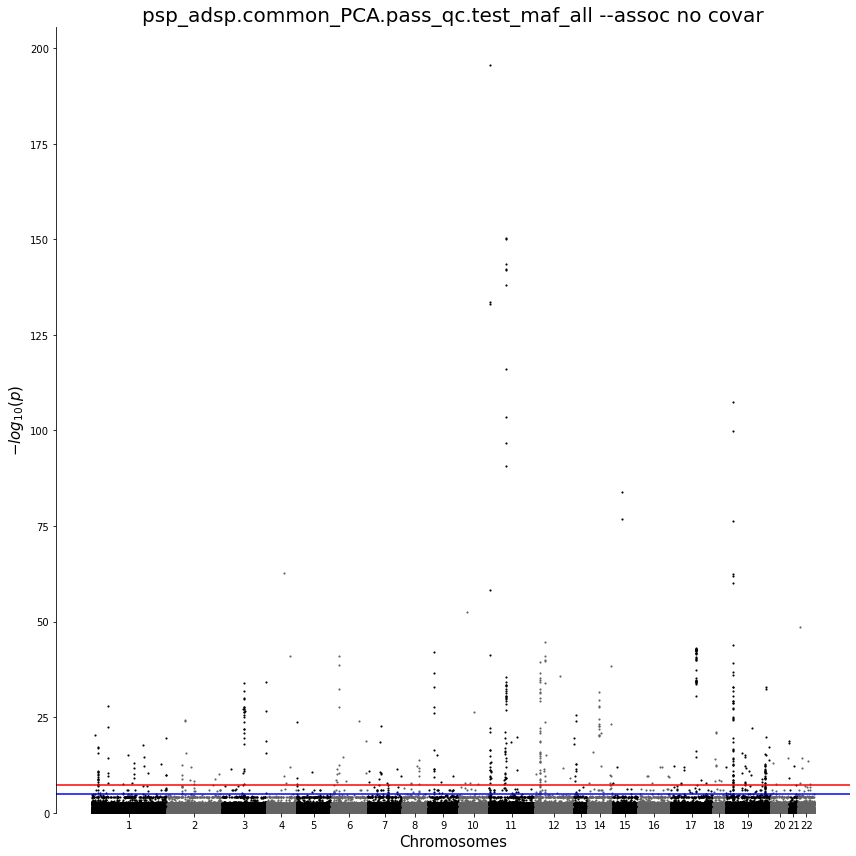

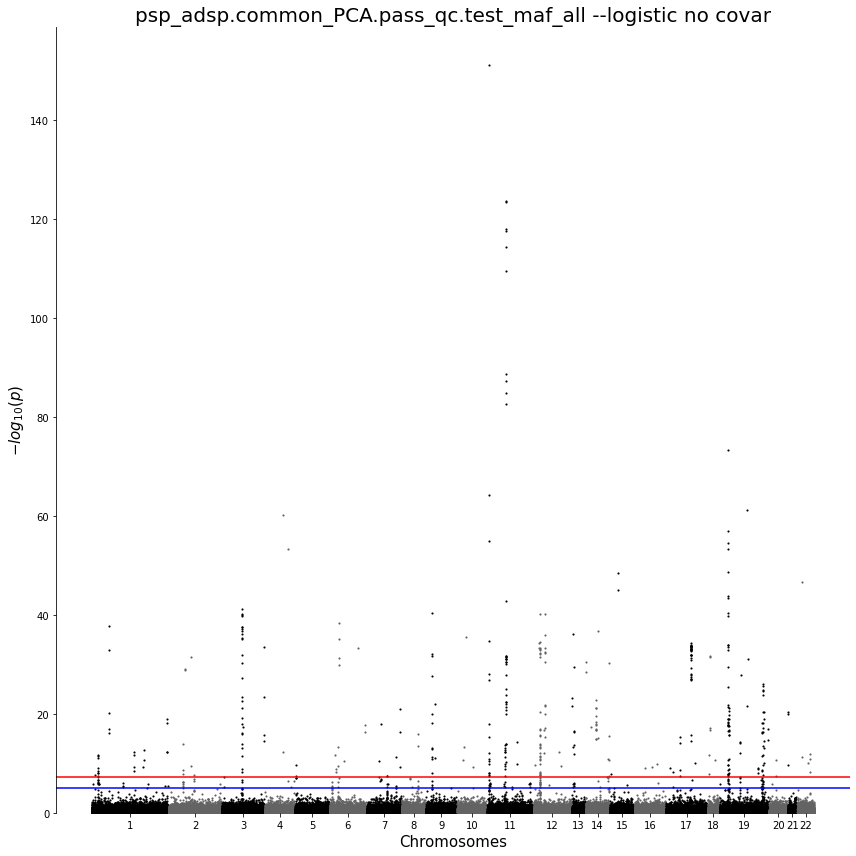

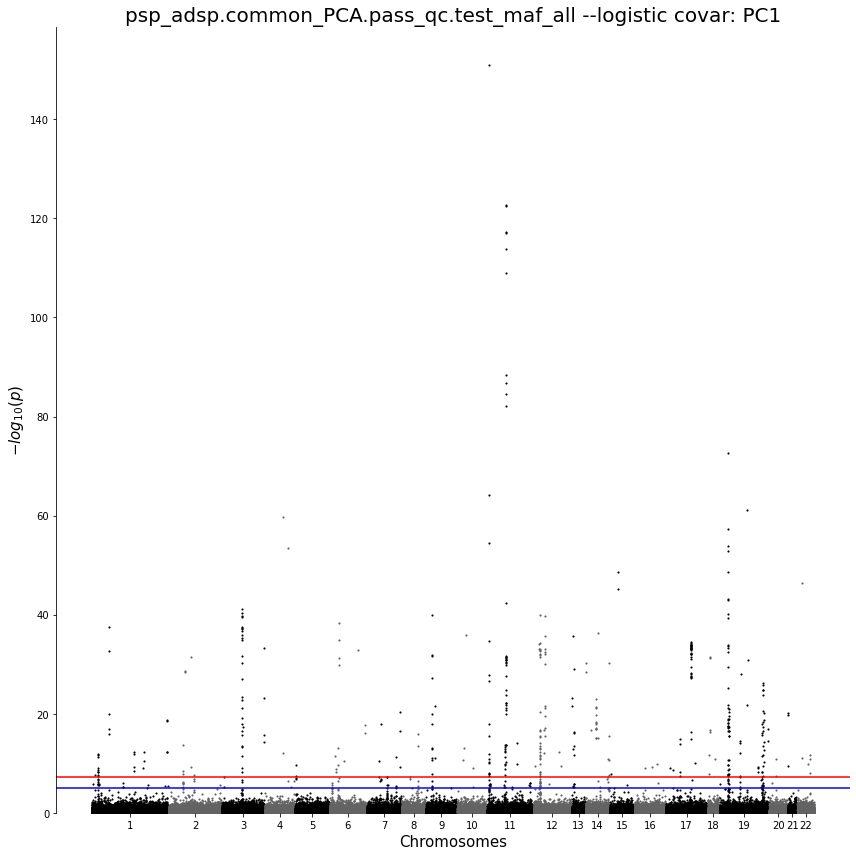

ValueError: min() arg is an empty sequence

In [23]:
## --assoc
qqman.manhattan(file_plink_assoc+'.assoc._no_covar.assoc', 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.assoc._no_covar.Manhattan.png'), 
                show=True, 
                title=MODEL_NAME + ' --assoc no covar')

## --logistic v0: no covar
qqman.manhattan(file_plink_assoc+'.logistic._no_covar.assoc.logistic', 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic._no_covar.Manhattan.png'), 
                show=True, 
                title=MODEL_NAME + ' --logistic no covar')

## --logistic v1: covar = PC1
qqman.manhattan(file_plink_assoc+'.logistic.covar_PC1.assoc.logistic', 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1.Manhattan.png'), 
                show=True, 
                title=MODEL_NAME + ' --logistic covar: PC1')

## --logistic v2: covar = PC1,PC2
qqman.manhattan(file_plink_assoc+'.logistic.covar_PC1-PC2.assoc.logistic', 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2.Manhattan.png'), 
                show=True, 
                title=MODEL_NAME + ' --logistic covar: PC1,PC2')

## --logistic v3: covar = PC1,PC2,PC3
qqman.manhattan(file_plink_assoc+'.logistic.covar_PC1-PC2-PC3.assoc.logistic', 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2-PC3.Manhattan.png'), 
                show=True, 
                title=MODEL_NAME + ' --logistic covar: PC1,PC2,PC3')

## --logistic v4: covar = PC1,PC2,PC3,H1H2
qqman.manhattan(file_plink_assoc+'.logistic.covar_PC1-PC2-PC3-H1H2.assoc.logistic', 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2-PC3-H1H2.Manhattan.png'), 
                show=True, 
                title=MODEL_NAME + ' --logistic covar: PC1,PC2,PC3,H1H2')


## <font color='red'> _NOTE: when PC2 (+) included as covar --> ALL SNPs have `P = NA` in .assoc.logistic_

<br>  

## qqplot

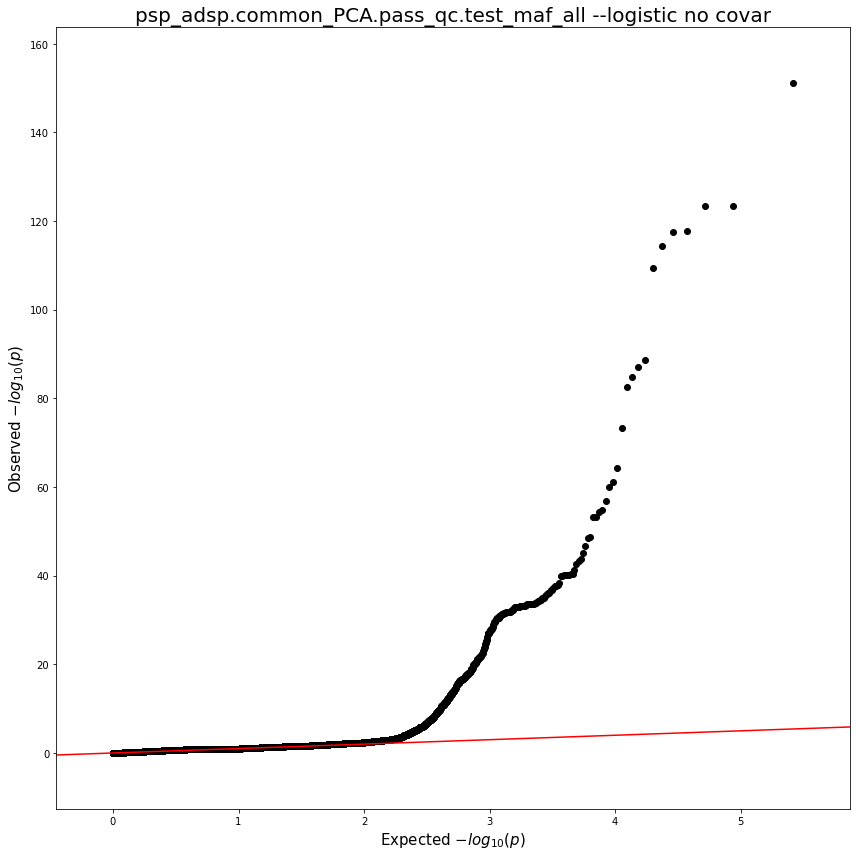

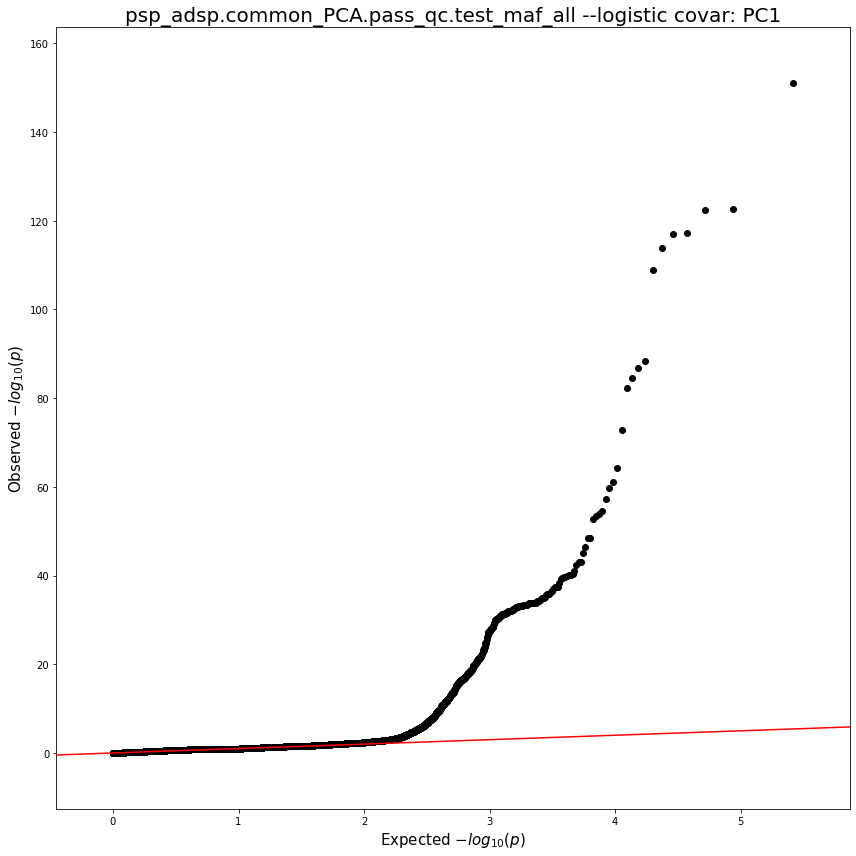

ValueError: zero-size array to reduction operation fmax which has no identity

In [17]:
## --assoc
qqman.qqplot(file_plink_assoc+'.assoc._no_covar.assoc', 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.assoc._no_covar.qqplot.png'), 
                show=True, 
                title=MODEL_NAME + ' --assoc no covar')


## --logistic v0: no covar
df_assoc = pd.read_csv(file_plink_assoc+'.logistic._no_covar.assoc.logistic', header=0, delim_whitespace=True)
pval_no_covar = list(df_assoc['P'])
del df_assoc

qqman.qqplot(pval_no_covar, 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic._no_covar.qqplot.png'), 
                show=True, 
                title=MODEL_NAME + ' --logistic no covar')


## --logistic v1: covar = PC1
df_assoc = pd.read_csv(file_plink_assoc+'.logistic.covar_PC1.assoc.logistic', header=0, delim_whitespace=True)
pval_PC1 = list(df_assoc['P'])
del df_assoc

qqman.qqplot(pval_PC1, 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1.qqplot.png'), 
                show=True, 
                title=MODEL_NAME + ' --logistic covar: PC1')


## --logistic v2: covar = PC1,PC2
df_assoc = pd.read_csv(file_plink_assoc+'.logistic.covar_PC1-PC2.assoc.logistic', header=0, delim_whitespace=True)
pval_PC1_PC2 = list(df_assoc['P'])
del df_assoc

qqman.qqplot(pval_PC1_PC2, 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2.qqplot.png'), 
                show=True, 
                title=MODEL_NAME + ' --logistic covar: PC1,PC2')


## --logistic v3: covar = PC1,PC2,PC3
df_assoc = pd.read_csv(file_plink_assoc+'.logistic.covar_PC1-PC2-PC3.assoc.logistic', header=0, delim_whitespace=True)
pval_PC1_PC2_PC3 = list(df_assoc['P'])
del df_assoc

qqman.qqplot(pval_PC1_PC2_PC3, 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2-PC3.qqplot.png'), 
                show=True, 
                title=MODEL_NAME + ' --logistic covar: PC1,PC2,PC3')


## --logistic v4: covar = PC1,PC2,PC3,H1H2
df_assoc = pd.read_csv(file_plink_assoc+'.logistic.covar_PC1-PC2-PC3-H1H2.assoc.logistic', header=0, delim_whitespace=True)
pval_PC1_PC2_PC3_H1H2 = list(df_assoc['P'])
del df_assoc

qqman.qqplot(pval_PC1_PC2_PC3_H1H2, 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2-PC3-H1H2.qqplot.png'), 
                show=True, 
                title=MODEL_NAME + ' --logistic covar: PC1,PC2,PC3,H1H2')


## <font color='red'> _NOTE: when PC2 (+) included as covar --> ALL SNPs have `P = NA` in .assoc.logistic_

In [26]:
!sort {file_plink_assoc+'.logistic.covar_PC1-PC2.assoc.logistic'} -rnk 8,8 | head -n 20

 CHR           SNP         BP   A1       TEST    NMISS         OR         STAT            P 


In [27]:
!head {file_plink_assoc+'.assoc._no_covar.assoc'}


 CHR           SNP         BP   A1      F_A      F_U   A2        CHISQ            P           OR 
   1      1_925935     925935    0        0        0    G           NA           NA           NA 
   1      1_925953     925953    T        0 0.0001217    G       0.1293       0.7192            0 
   1      1_925963     925963    0        0        0    G           NA           NA           NA 
   1      1_925969     925969    T        0 0.0002415    C        0.256       0.6129            0 
   1      1_925976     925976    C        0 0.0001209    T       0.1284       0.7201            0 
   1      1_925988     925988    T        0 0.0001222    C       0.1298       0.7186            0 
   1      1_926004     926004    0        0        0    C           NA           NA           NA 
   1      1_930222     930222    A        0 0.0001187    G       0.1021       0.7494            0 
   1      1_930235     930235    0        0        0    C           NA           NA           NA 


In [29]:
!sort {file_plink_assoc+'.assoc._no_covar.assoc'} -rnk 8,8 | head -n 20

  11    11_1018182    1018182    T   0.3427  0.05731    G        893.8   2.224e-196        8.577 
  11   11_56376430   56376430    T   0.3745  0.08689    C        685.9   3.521e-151        6.292 
  11   11_56376431   56376431    G   0.3717  0.08563    A        683.7   1.072e-150        6.318 
  11   11_56376415   56376415    A   0.4112   0.1088    T        654.7   2.124e-144        5.721 
  11   11_56376422   56376422    T   0.3911  0.09992    G          648   6.124e-143        5.786 
  11   11_56376424   56376424    T   0.3871  0.09816    C        646.5   1.268e-142        5.804 
  11   11_56376409   56376409    A   0.4213   0.1185    T        628.3   1.148e-138        5.417 
  11    11_1018291    1018291    C   0.1047 0.004246    G          608   3.017e-134        27.43 
  11    11_1018215    1018215  GCA  0.09375 0.002741    G        605.6   9.999e-134        37.63 
  11   11_56375649   56375649    T   0.4483   0.1481    C        528.4   6.228e-117        4.676 
  19    19_8886831  

In [18]:
!head {file_plink_assoc+'.logistic._no_covar.assoc.logistic'}


 CHR           SNP         BP   A1       TEST    NMISS         OR         STAT            P 
   1      1_930248     930248    A        ADD     4687     0.6318      -0.8835        0.377
   1      1_930285     930285    A        ADD     4713      2.816        1.266       0.2056
   1      1_935779     935779    A        ADD     4734     0.8083      -0.2028       0.8393
   1      1_939067     939067    A        ADD     4714      4.202        1.171       0.2415
   1      1_945611     945611    T        ADD     4746      7.917        1.462       0.1437
   1      1_946514     946514    A        ADD     4667      6.965        2.536      0.01121
   1      1_948538     948538    A        ADD     4687     0.3941       -1.284        0.199
   1      1_952056     952056    A        ADD     4709      8.509        1.513       0.1302
   1      1_952451     952451    A        ADD     4701      2.695       0.8579        0.391


In [20]:
!sort {file_plink_assoc+'.logistic._no_covar.assoc.logistic'} -rnk 8,8 | head 

  11    11_1018182    1018182    T        ADD     4354      16.83        26.25   8.119e-152
  11   11_56376431   56376431    G        ADD     4201      14.03        23.71   3.194e-124
  11   11_56376430   56376430    T        ADD     4250      14.19        23.69   4.793e-124
  11   11_56376424   56376424    T        ADD     4249      14.04        23.15   1.379e-118
  11   11_56376422   56376422    T        ADD     4248      14.38        23.12   2.901e-118
  11   11_56376415   56376415    A        ADD     4261      16.65        22.79   5.457e-115
  11   11_56376409   56376409    A        ADD     4269      17.23        22.29   4.295e-110
  11   11_56375649   56375649    T        ADD     4113      20.61        20.05    2.015e-89
  11   11_56376391   56376391    C        ADD     4255       15.6        19.87    7.349e-88
  11   11_56376388   56376388    G        ADD     4272      14.04        19.61    1.352e-85
sort: write failed: 'standard output': Broken pipe
sort: write error


In [24]:
!sort {file_plink_assoc+'.logistic.covar_PC1.assoc.logistic'} -rnk 8,8 | head -n 20

  11    11_1018182    1018182    T        ADD     4354      17.13        26.24   9.907e-152
  11   11_56376431   56376431    G        ADD     4201      13.97        23.63    1.96e-123
  11   11_56376430   56376430    T        ADD     4250      14.12        23.61   3.345e-123
  11   11_56376424   56376424    T        ADD     4249      14.02         23.1   4.779e-118
  11   11_56376422   56376422    T        ADD     4248      14.35        23.06   1.097e-117
  11   11_56376415   56376415    A        ADD     4261      16.65        22.76   1.252e-114
  11   11_56376409   56376409    A        ADD     4269      17.19        22.25   1.044e-109
  11   11_56375649   56375649    T        ADD     4113      20.55        20.01    4.285e-89
  11   11_56376391   56376391    C        ADD     4255      15.55        19.83    1.624e-87
  11   11_56376388   56376388    G        ADD     4272         14        19.57    2.811e-85
  11   11_56376382   56376382    C        ADD     4248      12.56        19.29  

#### write plot files

In [30]:
## --assoc
qqman.manhattan(file_plink_assoc+'.assoc._no_covar.assoc', 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.assoc._no_covar.Manhattan.png'), 
                show=False, 
                title=MODEL_NAME + ' --assoc no covar')

## --logistic v0: no covar
qqman.manhattan(file_plink_assoc+'.logistic._no_covar.assoc.logistic', 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic._no_covar.Manhattan.png'), 
                show=False, 
                title=MODEL_NAME + ' --logistic no covar')

## --logistic v1: covar = PC1
qqman.manhattan(file_plink_assoc+'.logistic.covar_PC1.assoc.logistic', 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1.Manhattan.png'), 
                show=False, 
                title=MODEL_NAME + ' --logistic covar: PC1')

# ## --logistic v2: covar = PC1,PC2
# qqman.manhattan(file_plink_assoc+'.logistic.covar_PC1-PC2.assoc.logistic', 
#                 out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2.Manhattan.png'), 
#                 show=False, 
#                 title=MODEL_NAME + ' --logistic covar: PC1,PC2')

# ## --logistic v3: covar = PC1,PC2,PC3
# qqman.manhattan(file_plink_assoc+'.logistic.covar_PC1-PC2-PC3.assoc.logistic', 
#                 out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2-PC3.Manhattan.png'), 
#                 show=False, 
#                 title=MODEL_NAME + ' --logistic covar: PC1,PC2,PC3')

# ## --logistic v4: covar = PC1,PC2,PC3,H1H2
# qqman.manhattan(file_plink_assoc+'.logistic.covar_PC1-PC2-PC3-H1H2.assoc.logistic', 
#                 out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2-PC3-H1H2.Manhattan.png'), 
#                 show=False, 
#                 title=MODEL_NAME + ' --logistic covar: PC1,PC2,PC3,H1H2')


In [31]:
## --assoc
qqman.qqplot(file_plink_assoc+'.assoc._no_covar.assoc', 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.assoc._no_covar.qqplot.png'), 
                show=False, 
                title=MODEL_NAME + ' --assoc no covar')


## --logistic v0: no covar
df_assoc = pd.read_csv(file_plink_assoc+'.logistic._no_covar.assoc.logistic', header=0, delim_whitespace=True)
pval_no_covar = list(df_assoc['P'])
del df_assoc

qqman.qqplot(pval_no_covar, 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic._no_covar.qqplot.png'), 
                show=False, 
                title=MODEL_NAME + ' --logistic no covar')


## --logistic v1: covar = PC1
df_assoc = pd.read_csv(file_plink_assoc+'.logistic.covar_PC1.assoc.logistic', header=0, delim_whitespace=True)
pval_PC1 = list(df_assoc['P'])
del df_assoc

qqman.qqplot(pval_PC1, 
                out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1.qqplot.png'), 
                show=False, 
                title=MODEL_NAME + ' --logistic covar: PC1')


# ## --logistic v2: covar = PC1,PC2
# df_assoc = pd.read_csv(file_plink_assoc+'.logistic.covar_PC1-PC2.assoc.logistic', header=0, delim_whitespace=True)
# pval_PC1_PC2 = list(df_assoc['P'])
# del df_assoc

# qqman.qqplot(pval_PC1_PC2, 
#                 out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2.qqplot.png'), 
#                 show=False, 
#                 title=MODEL_NAME + ' --logistic covar: PC1,PC2')


# ## --logistic v3: covar = PC1,PC2,PC3
# df_assoc = pd.read_csv(file_plink_assoc+'.logistic.covar_PC1-PC2-PC3.assoc.logistic', header=0, delim_whitespace=True)
# pval_PC1_PC2_PC3 = list(df_assoc['P'])
# del df_assoc

# qqman.qqplot(pval_PC1_PC2_PC3, 
#                 out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2-PC3.qqplot.png'), 
#                 show=False, 
#                 title=MODEL_NAME + ' --logistic covar: PC1,PC2,PC3')


# ## --logistic v4: covar = PC1,PC2,PC3,H1H2
# df_assoc = pd.read_csv(file_plink_assoc+'.logistic.covar_PC1-PC2-PC3-H1H2.assoc.logistic', header=0, delim_whitespace=True)
# pval_PC1_PC2_PC3_H1H2 = list(df_assoc['P'])
# del df_assoc

# qqman.qqplot(pval_PC1_PC2_PC3_H1H2, 
#                 out=os.path.join(DIR_ASSOC, MODEL_NAME+'.logistic.covar_PC1-PC2-PC3-H1H2.qqplot.png'), 
#                 show=False, 
#                 title=MODEL_NAME + ' --logistic covar: PC1,PC2,PC3,H1H2')
